# Developing the mapping function for Mesoscale Convective Regions

#### The main purpose of this notebook is to develop the tool to track:

- deep convective regions in a km scale simulation, 

- correlation between total cloud cover and severe precipitation. 

#### The plotting function 'map' can do a zooming on 

- pacific_ocean or its tropical area,

- atlantic_ocean or its tropical area,

- indian_ocean or its tropical area.

#### Users can also zoom in by parsing the latitude and longitude bands. 

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall

In [2]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 5000, first_edge = 0, width_of_bin = 1/50, loglevel='debug') #1/24

In [3]:
lumi=True

In [4]:
if lumi:
    reader  = Reader(model="IFS", exp="historical-1990-devcon", source="lra-r100-monthly")
    data    = reader.retrieve(var=["tprate"])
else:
    reader  = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
    data    = reader.retrieve(var=["tprate"])

2023-10-19 19:21:33 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-10-19 19:21:33 :: Reader :: WARNING  -> It would be safer to run with fix=False
2023-10-19 19:21:33 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-10-19 19:21:33 :: Reader :: WARNING  -> Would be safer to run with fix=False
2023-10-19 19:21:33 :: eccodes :: WARNING  -> ShortName tprate have multiple grib codes associated: ['260048', '172228']
2023-10-19 19:21:33 :: eccodes :: WARNING  -> AQUA will take the first so that tprate -> 260048, please set up a correct fix if this does not look right


#### The function can be applied to one dataset :

/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/diagnostics/tropical_rainfall/notebooks/../../tropical_rainfall/tropical_rainfall_class.py:2488: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  
/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/diagnostics/tropical_rainfall/notebooks/../../tropical_rainfall/tropical_rainfall_class.py:2490: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  axs[i].coastlines()
;1m2023-10-19 21:01:34 :: Trop. Rainfall :: DEBUG    -> The input time value for selection does not contain a year: 01
;1m2023-10-19 21:01:34 :: Trop. Rainfall :: DEBUG    -> The new time value for selection is: 1990-01
;1m2023-10-19 21:01:34 :: Trop. Rainfall :: DEBUG    -> The input time value for selection does not contain a day. The new time value for selection is: 1990-01-01
2023-10-19 21:01:34 :: Trop. Rainfall :: INFO     -> The time value for selection is: 1990-01-01


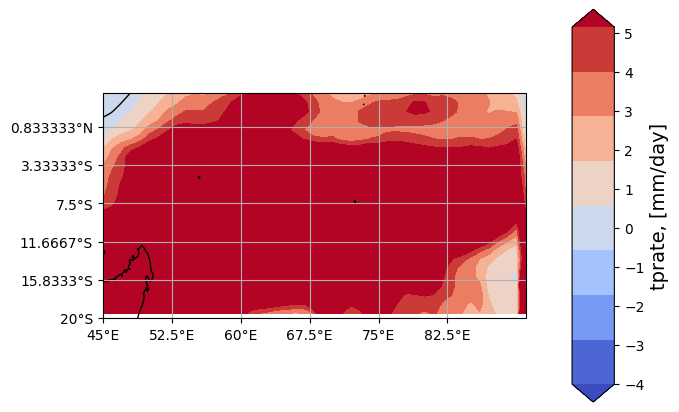

In [55]:
diag.map(data = data,  new_unit="mm/day", figsize =0.6, vmin=-4, vmax=5,  latmax=5, latmin=-20, lonmax = 90, lonmin=45)

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Or for a set of datasets or different variables:

/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/diagnostics/tropical_rainfall/notebooks/../../tropical_rainfall/tropical_rainfall_class.py:2481: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  print(data[i].lat.size, data[i].lon.size, data[i].time.size)
/pfs/lustrep3/projappl/project_465000454/nazarova/AQUA/diagnostics/tropical_rainfall/notebooks/../../tropical_rainfall/tropical_rainfall_class.py:2483: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  data_cycl, lons = add_cyclic_point(
2023-10-19 21:03:31 :: Trop. Rainfall :: INFO     -> The data was zoomed in.
2023-10-19 21:03:31 :: Trop. Rainfall :: INFO     -> The data was zoomed in.


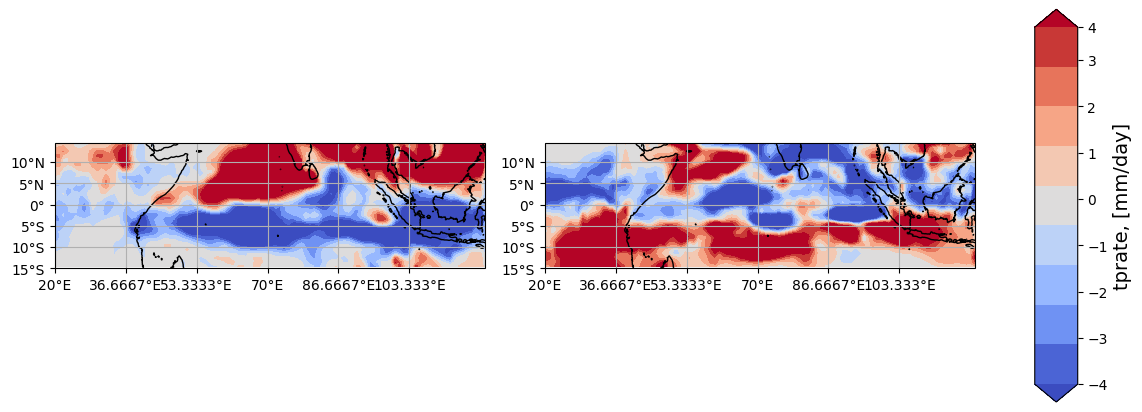

In [57]:
diag.map(data = [data.isel(time=5), data.isel(time=10)], new_unit="mm/day",  vmin=-4, vmax=4,\
    figsize =0.6, indian_ocean=True, tropical=True)

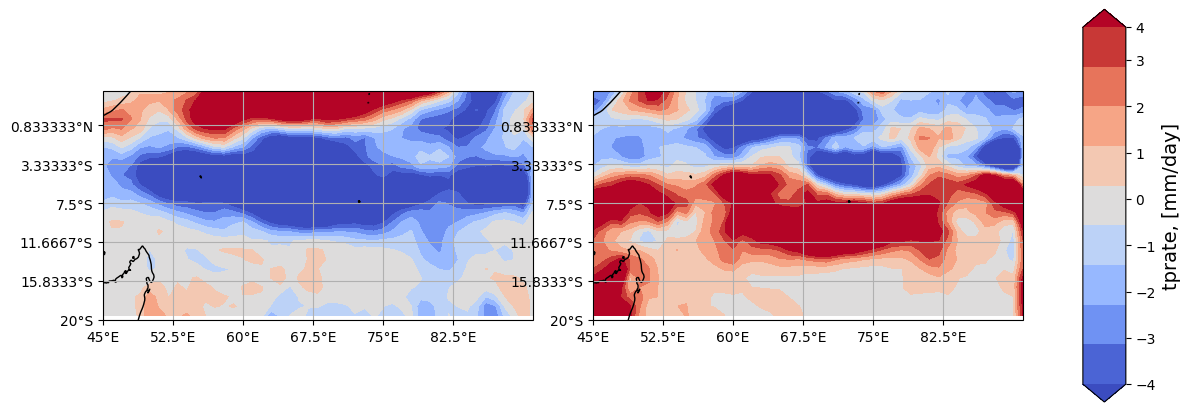

In [58]:
diag.map(data = [data.isel(time=5), data.isel(time=10)], new_unit="mm/day",  vmin=-4, vmax=4,\
    figsize =0.6, latmax=5, latmin=-20, lonmax = 90, lonmin=45) 

#### The map for high-resolution data:

In [ ]:
if not lumi:
    reader              = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="2D_1h_native")
    ifs_tco1279_orca025_retrived = reader.retrieve()